In [1]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [2]:
cd yolov5

/Users/jinayshah/Desktop/Drowsiness/yolov5


/Users/jinayshah/Library/Python/3.10/lib/python/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
pwd

'/Users/jinayshah/Desktop/Drowsiness/yolov5'

In [4]:
pip install -r requirements.txt

     |████████████████████████████████| 3.4 MB 3.0 MB/s eta 0:00:01
  Attempting uninstall: pillow
    Found existing installation: pillow 10.2.0
    Uninstalling pillow-10.2.0:
      Successfully uninstalled pillow-10.2.0
You should consider upgrading via the '/usr/local/bin/python3.10 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import cv2 

In [5]:
model = torch.hub.load('ultralytics/yolov5','yolov5s')

Using cache found in /Users/jinayshah/.cache/torch/hub/ultralytics_yolov5_master
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
YOLOv5 🚀 2024-3-26 Python-3.10.0 torch-2.2.1 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [6]:
img = 'https://ultralytics.com/images/zidane.jpg'
results = model(img)


In [7]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [9]:
results

YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 720x1280 2 persons, 2 ties
Speed: 1391.6ms pre-process, 84.6ms inference, 2.9ms NMS per image at shape (1, 3, 384, 640)

In [8]:
results.render()

[array([[[72, 48, 38],
         [74, 50, 40],
         [73, 51, 40],
         ...,
         [56, 21, 25],
         [55, 19, 21],
         [51, 15, 17]],
 
        [[71, 47, 37],
         [71, 47, 37],
         [70, 48, 37],
         ...,
         [55, 20, 24],
         [52, 16, 18],
         [47, 11, 13]],
 
        [[75, 51, 41],
         [73, 49, 39],
         [70, 48, 37],
         ...,
         [56, 20, 24],
         [52, 16, 20],
         [48, 12, 16]],
 
        ...,
 
        [[40, 43, 48],
         [41, 44, 49],
         [40, 43, 48],
         ...,
         [35, 49, 49],
         [35, 49, 49],
         [36, 50, 50]],
 
        [[39, 42, 49],
         [39, 42, 49],
         [39, 42, 49],
         ...,
         [35, 49, 50],
         [35, 49, 50],
         [36, 50, 51]],
 
        [[38, 41, 48],
         [38, 41, 48],
         [38, 41, 48],
         ...,
         [35, 49, 50],
         [35, 49, 50],
         [36, 50, 51]]], dtype=uint8)]

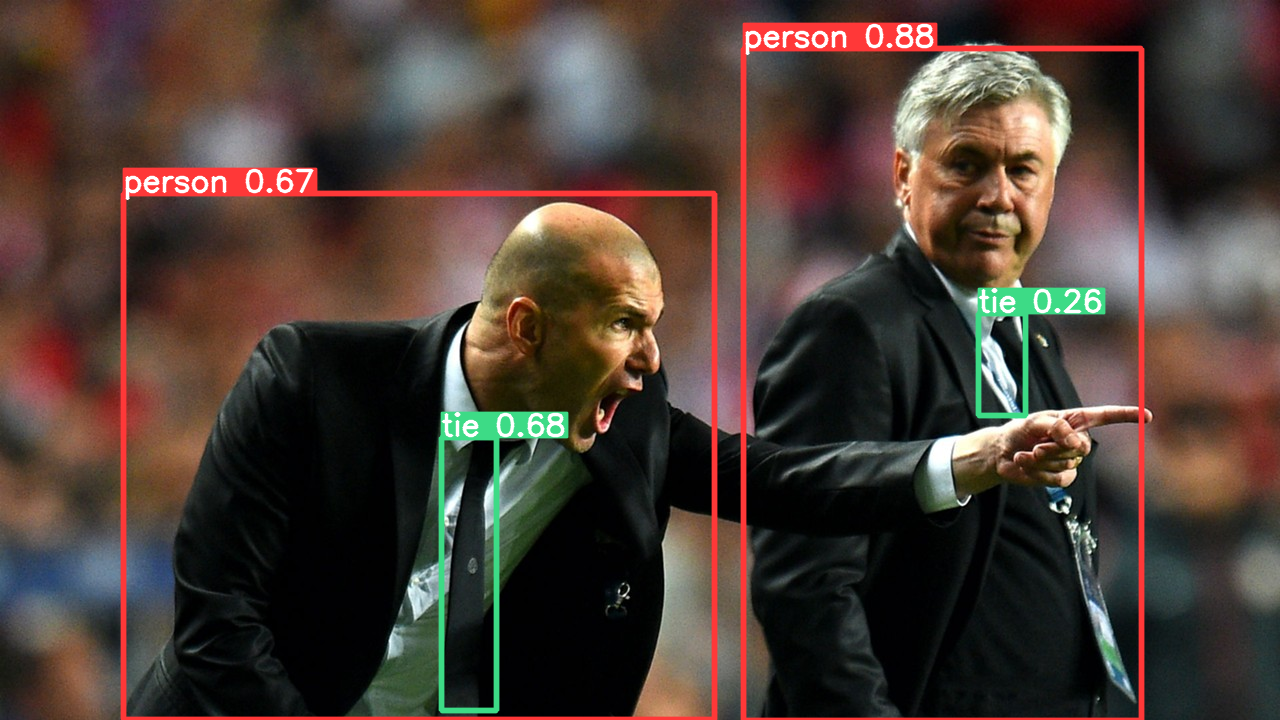

In [9]:
results.show()

In [12]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
import time
cap = cv2.VideoCapture(0)
while cap.isOpened() : 
    ret,frame = cap.read()
    results = model(frame)
    cv2.imshow('YOLO',np.squeeze(results.render()))
    if cv2.waitKey(10) & 0xFF == ord('q') :
        break
time.sleep(5)
cap.release()
time.sleep(5)
cv2.waitKey(1)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

: 

In [13]:
import uuid
import os
import time
import cv2

In [3]:
IMAGE_PATH = os.path.join('data','image')
labels = ['awake','drowsy']
number_images = 20
cap = cv2.VideoCapture(0)
for label in labels :
    print(f'Collecting images for {label}')
    time.sleep(5)
    for i in range(number_images) :
        print(f'Image number {i+1} for label {label}')
        ret,frame = cap.read()
        image_name = os.path.join(IMAGE_PATH,f'{label}.{str(uuid.uuid1())}.jpg')
        cv2.imwrite(image_name,frame)
        cv2.imshow('Capture',frame)
        time.sleep(2)
        if cv2.waitKey(100) & 0xFF == ord('q') :
            break
time.sleep(3)
cap.release()
time.sleep(3)
cv2.waitKey(1)
cv2.destroyAllWindows() 
cv2.waitKey(1)

Image number 1 for label awake
Image number 2 for label awake
Image number 3 for label awake
Image number 4 for label awake
Image number 5 for label awake
Image number 6 for label awake
Image number 7 for label awake
Image number 8 for label awake
Image number 9 for label awake
Image number 10 for label awake
Image number 11 for label awake
Image number 12 for label awake
Image number 13 for label awake
Image number 14 for label awake
Image number 15 for label awake
Image number 16 for label awake
Image number 17 for label awake
Image number 18 for label awake
Image number 19 for label awake
Image number 20 for label awake
Image number 1 for label drowsy
Image number 2 for label drowsy
Image number 3 for label drowsy
Image number 4 for label drowsy
Image number 5 for label drowsy
Image number 6 for label drowsy
Image number 7 for label drowsy
Image number 8 for label drowsy
Image number 9 for label drowsy
Image number 10 for label drowsy
Image number 11 for label drowsy
Image number 12

-1

In [3]:
! git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...
remote: Enumerating objects: 2097, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 2097 (delta 0), reused 4 (delta 0), pack-reused 2090
Receiving objects: 100% (2097/2097), 237.14 MiB | 3.77 MiB/s, done.
Resolving deltas: 100% (1245/1245), done.


In [4]:
! pip install pyqt5 lxml --upgrade
! cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 5.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 4.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.7/36.7 MB 4.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.4/146.4 kB 4.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [18]:
!pwd

/Users/jinayshah/Desktop/Drowsiness/yolov5


In [12]:
!python3 train.py --img 320 --batch 16 --epochs 500 --data dataset.yaml --weights yolov5s.pt --workers 2

Traceback (most recent call last):
  File "train.py", line 37, in <module>
    import yaml
ModuleNotFoundError: No module named 'yaml'


In [10]:
import torch
model = torch.hub.load('ultralytics/yolov5','custom',path='/Users/jinayshah/Desktop/Drowsiness/yolov5/runs/train/exp8/weights/last.pt',force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/jinayshah/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-5-16 Python-3.10.0 torch-2.2.1 CPU



Exception: [Errno 2] No such file or directory: '/Users/jinayshah/Desktop/Drowsiness/yolov5/runs/train/exp8/weights/last.pt'. Cache may be out of date, try `force_reload=True` or see https://docs.ultralytics.com/yolov5/tutorials/pytorch_hub_model_loading for help.

In [14]:
import os
img = os.path.join('data','images','awake.97b51126-ea5f-11ee-bae9-f65bf996cd38.jpg')
results = model(img)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jinayshah/Desktop/Drowsiness/yolov5/data/images/awake.97b51126-ea5f-11ee-bae9-f65bf996cd38.jpg'

In [7]:
results.print()

image 1/1: 1080x1920 1 awake
Speed: 35.2ms pre-process, 79.2ms inference, 0.7ms NMS per image at shape (1, 3, 384, 640)


In [13]:
import time
import cv2
import numpy as np
cap = cv2.VideoCapture(0)
while cap.isOpened() : 
    ret,frame = cap.read()
    results = model(frame)
    cv2.imshow('YOLO',np.squeeze(results.render()))
    if cv2.waitKey(10) & 0xFF == ord('q') :
        break
time.sleep(5)
cap.release()
time.sleep(5)
cv2.waitKey(1)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

: 